# 2020/2021 External UT Transfer Data (Fall Semester)

In [325]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re

This notebook consists of the following:


### Descriptive Statistics: 

- Average GPA by College
- Acceptance Rate by College
- Number of Applcations by College
- Entry Submission Dates
- Most Common Majors
- Least Common Majors

### Naive Bayes Classifier 
- Predicts a students chance of acceptance 
- 75% Accurate


# Part I: Clean Data

In [585]:

df20 = pd.read_csv('2020.csv', parse_dates=['Timestamp'])
df21 = pd.read_csv('2021.csv', parse_dates=['Timestamp'])
df21.rename(columns = {"Credit Hours (Please include the exact number)": "Hours"}, inplace=True) 
frames = [df20, df21]
dfMerged = pd.concat(frames, ignore_index=True)
dfMerged['GPA'] = dfMerged['GPA'].apply(lambda gpa: float(gpa))
dfMerged['Timestamp'] = dfMerged['Timestamp'].apply(lambda date: date.date())
dfMerged

,Timestamp,Decision,College,Major,GPA,Hours,Residency,CAP
0,2020-05-28,Admitted,COLA,Psychology,3.43,40,In state,Yes
1,2020-05-28,Admitted,COLA,History,3.90,31,In state,Yes
2,2020-05-28,Admitted,COLA,Human Dimensions Of Organizations,4.00,30,In state,Yes
3,2020-05-28,Admitted,COLA,Psychology,3.50,50,In state,Yes
4,2020-05-28,Admitted,COLA,Psychology,3.70,60,In state,Yes
...,...,...,...,...,...,...,...,...
827,2021-07-22,Admitted,Nursing,Nursing,3.86,86,In State,No
828,2021-08-04,Admitted,McCombs,Unspecified Business,3.89,61,In State,No
829,2021-08-06,Admitted,Moody,Corporate Communications,4.00,32,In State,Yes
830,2021-08-18,Admitted,Moody,Advertising,4.00,33,In State,Yes


## Average GPA by College

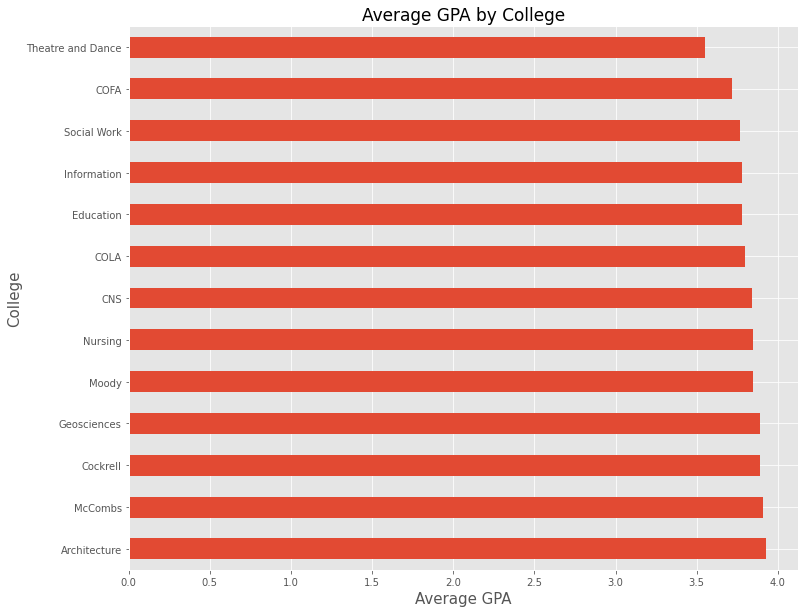

,GPA
College,
Architecture,3.93
McCombs,3.91
Cockrell,3.89
Geosciences,3.89
Moody,3.85
Nursing,3.85
CNS,3.84
COLA,3.80
Education,3.78


In [621]:
averageGPA = dfMerged[['College', 'GPA']].groupby(['College']).mean().round(2).sort_values('GPA', ascending=False)
averageGPA.plot.barh(legend = False)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12,10) 

plt.title('Average GPA by College', size=17)
plt.xlabel('Average GPA', size = 15)
plt.ylabel('College', size = 15)
plt.show()
averageGPA

## Number of Applications by College

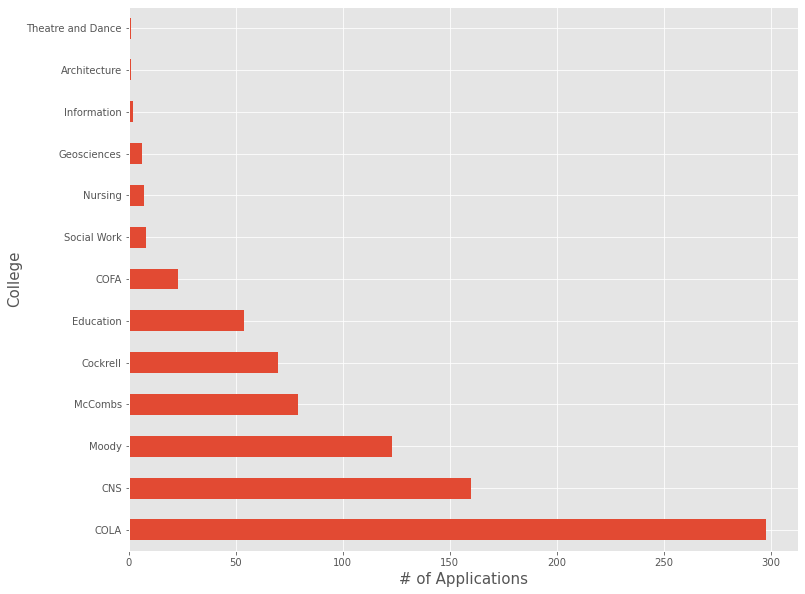

COLA                 298
CNS                  160
Moody                123
McCombs               79
Cockrell              70
Education             54
COFA                  23
Social Work            8
Nursing                7
Geosciences            6
Information            2
Architecture           1
Theatre and Dance      1
Name: College, dtype: int64

In [610]:
applications = dfMerged['College'].value_counts()
applications.plot.barh(legend = False)
plt.style.use('ggplot')
plt.xlabel('# of Applications', size = 15)
plt.ylabel('College', size = 15)
plt.show()
applications

## Acceptance Rate by College


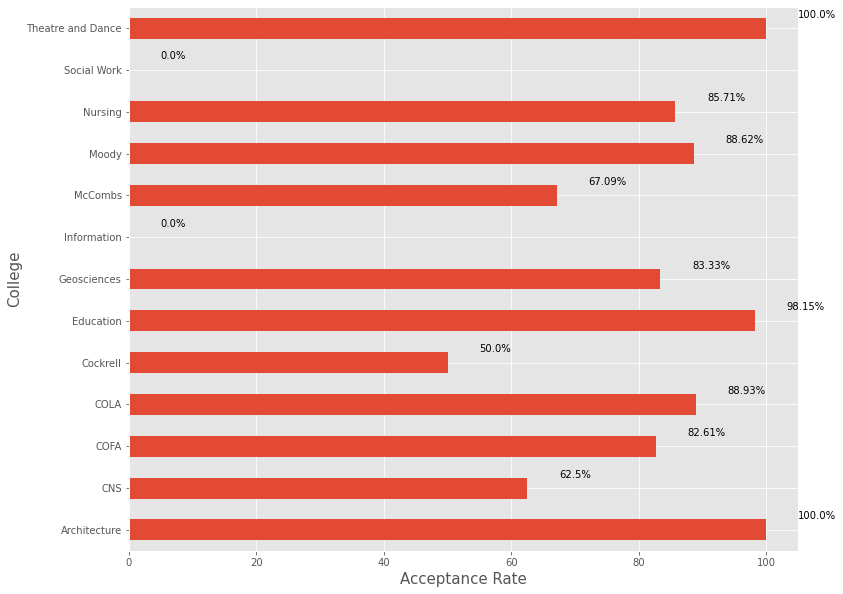

College
Architecture         100.000000
CNS                   62.500000
COFA                  82.608696
COLA                  88.926174
Cockrell              50.000000
Education             98.148148
Geosciences           83.333333
Information            0.000000
McCombs               67.088608
Moody                 88.617886
Nursing               85.714286
Social Work            0.000000
Theatre and Dance    100.000000
Name: Decision, dtype: float64

In [609]:
def acceptanceRate(decision):
    decisions = decision.value_counts()
    if len(decisions) == 1:
        if decisions['Admitted'] == 1:
            return 100
        else:
            return 0
        
    admitted = decisions[0]
    denied = decisions[1]
    return 100 * float((admitted/(admitted+denied)))

acceptanceRates = dfMerged.groupby(['College'])['Decision'].apply(acceptanceRate)
acceptanceRates.plot.barh(legend = False)
for i, v in enumerate(acceptanceRates):
    v = round(v, 2)
    plt.text(v + 5, i + .25, str(v)+ "%", color='black', fontweight='light')
plt.style.use('ggplot')
plt.xlabel('Acceptance Rate', size = 15)
plt.ylabel('College', size = 15)
plt.show()
acceptanceRates

In [442]:
acceptanceRates = dfMerged.groupby(['College'])['Decision'].value_counts()
acceptanceRates

College            Decision
Architecture       Admitted      1
CNS                Admitted    100
                   Denied       60
COFA               Admitted     19
                   Denied        4
COLA               Admitted    265
                   Denied       33
Cockrell           Admitted     35
                   Denied       35
Education          Admitted     53
                   Denied        1
Geosciences        Admitted      5
                   Denied        1
Information        Admitted      2
McCombs            Admitted     53
                   Denied       26
Moody              Admitted    109
                   Denied       14
Nursing            Denied        6
                   Admitted      1
Social Work        Admitted      8
Theatre and Dance  Admitted      1
Name: Decision, dtype: int64

### Entry Submisions Dates

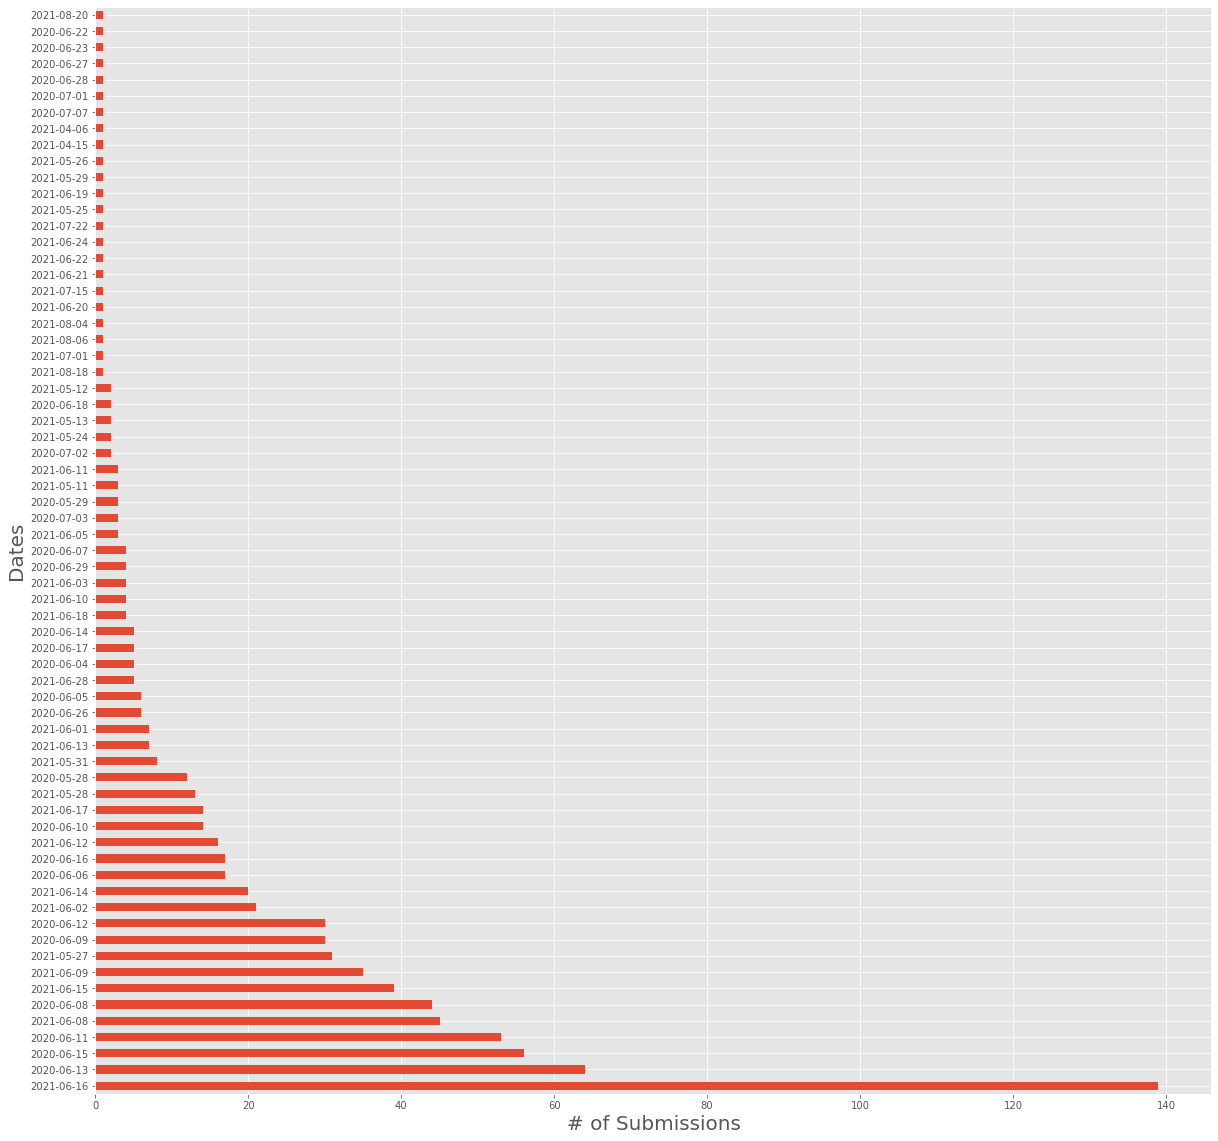

In [475]:
dates = dfMerged['Timestamp'].value_counts()
dates.plot.barh(legend = False)
plt.rcParams["figure.figsize"] = (20,20) 
plt.style.use('ggplot')
plt.xlabel('# of Submissions', size = 20)
plt.ylabel('Dates', size = 20)
plt.show()

## Most and Least Common Majors

In [624]:

def test(majors):
    unique = {}
    
    for major in majors:
        if major in unique:
            unique[major] += 1
        else: 
            unique[major] = 1
    return unique

unique20 = test(df20['Major'])
unique21 = test(df21['Major'])

In [625]:
def merge(dic1, dic2):
    newDic = {}
    for key in dic1:
        if key in dic2:
            newDic[key] = dic1[key] + dic2[key]
        else:
            newDic[key] = dic1[key]
    
    for key in dic2:
        if key not in newDic:
            newDic[key] = dic2[key]
    return newDic


combine = merge(unique20, unique21)

In [626]:
for key in sorted(combine.items(), key=lambda item: item[1], reverse=True):
    print(key[0] + ": " + str(key[1]))

Psychology: 75
Unspecified Business: 57
Government: 49
Computer Science: 47
Advertising: 37
Biology: 36
International Relations And Global Studies: 34
Economics: 32
Radio-Television-Film: 28
Public Relations: 19
Sociology: 17
Mechanical Engineering: 17
Biochemistry: 15
Public Health: 15
History: 13
Exercise Science: 13
English: 13
Applied Learning And Development: 12
Mathematics: 12
Health And Society: 10
Electrical Engineering: 10
Sustainability Studies: 10
Neuroscience: 9
Journalism: 9
Philosophy: 9
Physics: 9
Corporate Communications: 8
Civil Engineering: 8
Finance: 8
Biomedical Engineering: 7
Social Work: 7
Nutrition: 7
Aerospace Engineering: 7
Physical Culture And Sports: 7
Nursing: 7
Business: 7
Chemical Engineering: 7
Human Dimensions Of Organizations: 6
Design: 6
Communication Sciences And Disorders: 6
Linguistics: 6
Arts And Entertainment Technologies: 6
Communication And Leadership: 5
Environmental Science: 5
Applied Movement Science: 4
Asian Studies: 4
Environmental Engineer

## Top 20 Most Common Majors


In [627]:
for key in sorted(combine.items(), key=lambda item: item[1], reverse=True)[:20]:
    print(key[0] + ": " + str(key[1]))

Psychology: 75
Unspecified Business: 57
Government: 49
Computer Science: 47
Advertising: 37
Biology: 36
International Relations And Global Studies: 34
Economics: 32
Radio-Television-Film: 28
Public Relations: 19
Sociology: 17
Mechanical Engineering: 17
Biochemistry: 15
Public Health: 15
History: 13
Exercise Science: 13
English: 13
Applied Learning And Development: 12
Mathematics: 12
Health And Society: 10


## Top 20 Least Common Majors

In [628]:
for key in sorted(combine.items(), key=lambda item: item[1])[:20]:
    print(key[0] + ": " + str(key[1]))

Visual Arts Studies: 1
Pre-Athletic Training: 1
Speech Language/Pathology: 1
Early Childhood Education: 1
Chemistry: 1
Religious Studies: 1
General Geology: 1
Mexican American Studies: 1
Geography: 1
Business Administration: 1
Communication Studies: 1
Interior Design: 1
Astronomy: 1
Visual Art Studies: 1
Theatre Education: 1
Geoscience: 1
Scenic Design: 1
Gender Studies: 1
Behavioral Science And Health Promotion: 1
Linguisitcs: 1


## Replace college string values with integers



1. COLA
2. CNS
3. Moody
4. McCombs
5. Cockrell
6. Education
7. COFA
8. Social Work
9. Nursing
10. Geosciences
11. Information
12. Architecture
13. Theatre and Dance
 

In [570]:
newdf20 = df20[['Decision', 'College', 'GPA', 'Hours', 'Residency', 'CAP']].copy()
newdf21 = df21[['Decision', 'College', 'GPA', 'Hours', 'Residency', 'CAP']].copy()

newdf20.replace({'College': {'COLA': 1, 'CNS': 2, 'Moody': 3, 'McCombs': 4, 'Cockrell': 5, 'Education': 6,
                         'COFA': 7, 'Social Work': 8, 'Nursing': 9, 'Geosciences': 10, 'Information':11,
                         'Architecture': 12, 'Theatre and Dance': 13}}, inplace=True)

newdf21.replace({'College': {'COLA': 1, 'CNS': 2, 'Moody': 3, 'McCombs': 4, 'Cockrell': 5, 'Education': 6,
                         'COFA': 7, 'Social Work': 8, 'Nursing': 9, 'Geosciences': 10, 'Information':11,
                         'Architecture': 12, 'Theatre and Dance': 13}}, inplace=True)

## Replace the rest of the string values 

### Decision
0. Denied
1. Admitted

### Residency
0. Out of State
1. In State

### CAP
0. No
1. Yes

In [571]:
newdf20.replace({'Decision': {'Denied': 0, 'Admitted': 1}, 'Residency': {"International": 0,"Out of state": 0, "In state": 1},
             'CAP': {'No': 0, 'Yes': 1}}, inplace=True)

newdf21.replace({'Decision': {'Denied': 0, 'Admitted': 1}, 'Residency': {"International": 0,"Out of State": 0, "In State": 1},
             'CAP': {'No': 0, 'Yes': 1}}, inplace=True)
newdf20

,Decision,College,GPA,Hours,Residency,CAP
0,1,1,3.43,40,1,1
1,1,1,3.90,31,1,1
2,1,1,4.00,30,1,1
3,1,1,3.50,50,1,1
4,1,1,3.70,60,1,1
...,...,...,...,...,...,...
383,0,1,3.80,60,1,0
384,1,3,4.00,44,1,1
385,1,2,3.89,70,1,0
386,1,2,4.00,92,1,0


### Combine Both New Df's

Turn all GPA value into floats as some of them were read as strings

In [574]:
df_merged = newDf20.append(newDf21, ignore_index=True)
df_merged['GPA'] = df_merged['GPA'].apply(lambda x: float(x))

df_merged

/var/folders/_t/8m501xg90sq731lrqjx35mr40000gn/T/ipykernel_4261/629725331.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_merged = newDf20.append(newDf21, ignore_index=True)


,Decision,College,GPA,Hours,Residency,CAP
0,1,1,3.43,40,1,1
1,1,1,3.90,31,1,1
2,1,1,4.00,30,1,1
3,1,1,3.50,50,1,1
4,1,1,3.70,60,1,1
...,...,...,...,...,...,...
827,1,9,3.86,86,1,0
828,1,4,3.89,61,1,0
829,1,3,4.00,32,1,1
830,1,3,4.00,33,1,1


### Number of Acceptances

In [584]:
(df_merged['Decision']==1).sum() 

652

## Create Target and Inputs to pass into the Naive Bayes Classifier

In [575]:
target = df_merged.Decision
inputs = df_merged.drop('Decision', axis='columns')
inputs

,College,GPA,Hours,Residency,CAP
0,1,3.43,40,1,1
1,1,3.90,31,1,1
2,1,4.00,30,1,1
3,1,3.50,50,1,1
4,1,3.70,60,1,1
...,...,...,...,...,...
827,9,3.86,86,1,0
828,4,3.89,61,1,0
829,3,4.00,32,1,1
830,3,4.00,33,1,1


In [576]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, test_size = 0.2)

In [577]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB()

In [578]:
model.score(X_test, Y_test)

0.7544910179640718

In [579]:
model.predict(X_test[:10])

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [582]:
Y_test[:10]

675    0
426    1
722    0
484    1
476    1
21     1
237    1
798    0
328    0
74     1
Name: Decision, dtype: int64

## Replace college string values with integers



1. COLA
2. CNS
3. Moody
4. McCombs
5. Cockrell
6. Education
7. COFA
8. Social Work
9. Nursing
10. Geosciences
11. Information
12. Architecture
13. Theatre and Dance
 

In [313]:
students = pd.DataFrame(columns = ['College', 'GPA', 'Hours', 'Residency', 'CAP'])
students = students.append({'College' : 1 , 'GPA' : 4.0, 'Hours' : 55, 'Residency': 1 , 'CAP': 0},
        ignore_index = True)
students

/var/folders/_t/8m501xg90sq731lrqjx35mr40000gn/T/ipykernel_4261/4258565004.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  students = students.append({'College' : 1 , 'GPA' : 4.0, 'Hours' : 55, 'Residency': 1 , 'CAP': 0},


,College,GPA,Hours,Residency,CAP
0,1.0,4.0,55.0,1.0,0.0


In [633]:
model.predict_proba(students[:1])

array([[0.34871653, 0.65128347]])